<a href="https://colab.research.google.com/github/205410110/107-2-Multimedia/blob/master/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()

model.add(Conv2D(filters=16,
  kernel_size=(5,5),
  padding='same',
  input_shape=(28,28,1),
  activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
  kernel_size=(5,5),
  padding='same',
  activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
          
model.add(Dropout(0.5))
          
model.add(Dense(10,activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)  

In [4]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize,
  y=y_TrainOneHot,validation_split=0.2,
  epochs=20, batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 39s - loss: 0.4900 - acc: 0.8475 - val_loss: 0.0953 - val_acc: 0.9731
Epoch 2/20
 - 38s - loss: 0.1400 - acc: 0.9590 - val_loss: 0.0633 - val_acc: 0.9805
Epoch 3/20
 - 38s - loss: 0.1023 - acc: 0.9692 - val_loss: 0.0505 - val_acc: 0.9840
Epoch 4/20
 - 38s - loss: 0.0838 - acc: 0.9753 - val_loss: 0.0459 - val_acc: 0.9861
Epoch 5/20
 - 38s - loss: 0.0715 - acc: 0.9780 - val_loss: 0.0396 - val_acc: 0.9881
Epoch 6/20
 - 38s - loss: 0.0644 - acc: 0.9808 - val_loss: 0.0392 - val_acc: 0.9889
Epoch 7/20
 - 38s - loss: 0.0569 - acc: 0.9826 - val_loss: 0.0439 - val_acc: 0.9872
Epoch 8/20
 - 38s - loss: 0.0511 - acc: 0.9843 - val_loss: 0.0341 - val_acc: 0.9902
Epoch 9/20
 - 38s - loss: 0.0448 - acc: 0.9864 - val_loss: 0.0349 - val_acc: 0.9903
Epoch 10/20
 - 38s - loss: 0.0427 - acc: 0.9870 - val_loss: 0.0351 - val_acc: 0.9901
Epoch 11/20
 - 38s - loss: 0.0415 - acc: 0.9874 - val_loss: 0

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

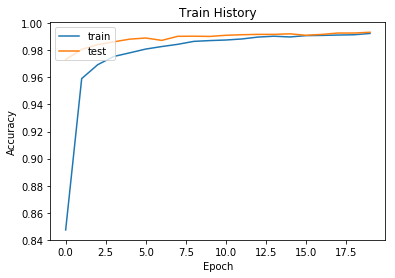

In [6]:
show_train_history('acc','val_acc')

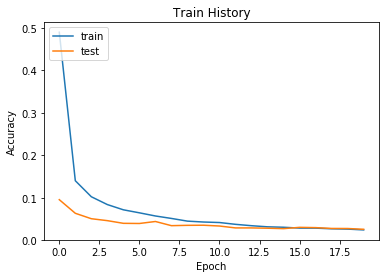

In [7]:
show_train_history('loss','val_loss')

In [8]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 362us/step


0.9942

In [9]:
prediction=model.predict_classes(x_Test4D_normalize)

prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

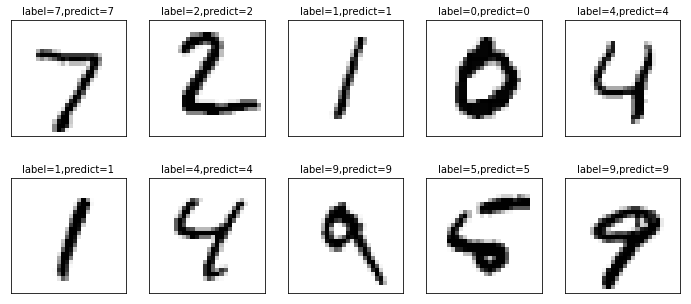

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    ax=plt.subplot(5,5, 1+i)
    ax.imshow(images[idx], cmap='binary')
    ax.set_title("label="+str(labels[idx])+
      ",predict="+str(prediction[idx])
      ,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()
  
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [11]:
import pandas as pd
pd.crosstab(y_Test,prediction,
  rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1132,1,0,0,0,0,0,2,0
2,2,0,1026,0,0,0,0,2,2,0
3,0,0,0,1005,0,3,0,0,2,0
4,0,0,0,0,978,0,0,0,2,2
5,0,0,0,3,0,887,1,0,0,1
6,2,3,0,0,2,1,949,0,1,0
7,0,2,1,0,0,0,0,1022,1,2
8,1,0,2,2,0,1,0,0,966,2


In [12]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3
